# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
# 1. Get the total rides for each city type
# use the groupby() function to create a Series of data that has the type of city as the index, then apply the count() method to the "ride_id" column.
type_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
# use the groupby() function to create a Series of data that has the type of city as the index, then apply the sum() method to the "driver_count" column.
type_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
type_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
# 3. Get the total amount of fares for each city type
# use the groupby() function to create a Series of data that has the type of city as the index, then apply the sum() method to the "fare" column.
type_fare_total = pyber_data_df.groupby(["type"]).sum()["fare"]
type_fare_total

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
# 4. Get the average fare per ride for each city type
# calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.
type_avg_fareride =  (type_fare_total / type_ride_count)
type_avg_fareride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type
# calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers.
type_avg_faredriver =  (type_fare_total / type_driver_count)
type_avg_faredriver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
# 6. Create a PyBer summary DataFrame
# create a PyBer summary DataFrame with all the data gathered from Steps 1-5, using the column names: (Total Rides, Total Drivers, Total Fares, Average Fare per Ride, Average Fare per Driver).
# Create a DataFrame
pyber_summary_df = pd.DataFrame({
        "Total Rides": type_ride_count, 
        "Total Drivers": type_driver_count, 
        "Total Fares": type_fare_total,
        "Average Fare per Ride": type_avg_fareride, 
        "Average Fare per Driver": type_avg_faredriver})
pyber_summary_df           

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
# 7. Cleaning up the DataFrame. Delete the index name
# use the provided code snippet to remove the index name ("type") from the PyBer summary DataFrame.
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
# 8. Format the Fare Columns for currency with commas.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

# Display the data frame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# Print the merged DataFrame for reference.
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [12]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares for each date where the indices are the city type and date.
# create a new DataFrame with multiple indices using the groupby() function on the "type" and "date" columns of the pyber_data_df DataFrame, then apply the sum() method on the "fare" column to show the total fare amount for each date.
fares_date_sum = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
fares_date_sum

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [13]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_date_sum = fares_date_sum.reset_index()
fares_date_sum

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [14]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' to get the total fares for each type of city by the date. 
# use the pivot() function to convert the DataFrame from the previous step so that the index is the "date," each column is a city "type," and the values are the "fare." 
fares_date_sum_pivot = fares_date_sum.pivot(index="date", columns="type", values="fare")
fares_date_sum_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [15]:
fares_date_sum_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2+ KB


In [16]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_janapr_sum = fares_date_sum_pivot.loc['2019-01-01':'2019-04-29']
fares_janapr_sum

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [17]:
fares_janapr_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6+ KB


In [18]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fares_janapr_sum.index = pd.to_datetime(fares_janapr_sum.index)

In [19]:
# 6. Check that the datatype for the index is datetime using df.info()
fares_janapr_sum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [20]:
fares_janapr_sum

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [21]:
# 7. Create a new DataFrame by applying the resample() function to the DataFrame you modified in Step 5. Resample the data in weekly bins, then apply the sum() method to get the total fares for each week.
# watch resample video on Challenge
fares_janapr_wk_sum = fares_janapr_sum.resample('W').sum()

In [22]:
# Confirm Datafram looks like Challenge
fares_janapr_wk_sum

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


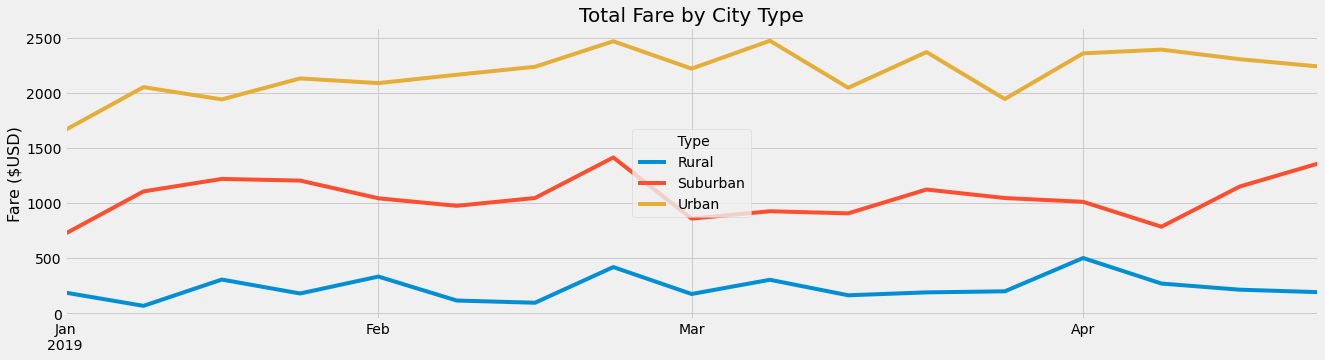

In [23]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# graph the resampled DataFrame from Step 7 using the object-oriented interface method and the df.plot() method, as well as the Matplotlib "fivethirtyeight" graph style code snippet provided in the starter code. Annotate the y-axis label and the title, then use the appropriate code to save the figure as PyBer_fare_summary.png in your "analysis" folder.

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = fares_janapr_wk_sum.plot(figsize = (20,5))

ax.set_title("Total Fare by City Type", fontsize = "20")
ax.set_xlabel("")
ax.set_ylabel("Fare ($USD)", fontsize = "16")
ax.legend(loc= "center", title = (" Type"))

plt.savefig("analysis/pyber_fare_summary.png")


In [24]:
# Confirm that your multiple-line chart looks like the challenge image, where each week is a peak or dip in the line graphs.

In [25]:
# Deliverable 2 

# A DataFrame was created using the groupby() function on the "type" and "date" columns, and the sum() method is applied on the "fare" column to show the total fare amount for each date and time. (10 pt)
# A DataFrame was created using the pivot() function where the index is the "date," the columns are the city "type," and the values are the "fare." (10 pt)
# A DataFrame was created using the loc method on the date range: 2019-01-01 through 2019-04-28. (5 pt)
# A DataFrame was created using the resample() function in weekly bins and shows the sum of the fares for each week. (10 pt)
# An annotated chart showing the total fares by city type is created and saved to the "analysis" folder. (10 pt)

In [26]:
# Deliverable 3 

# write your analysis of how to address any disparities in the ride-sharing data among the city types.
#   Overview of the analysis: Explain the purpose of the new analysis.
    # The purpose of the new analysis is well defined. (3 pt)
#   Results: Using images from the summary DataFrame and multiple-line chart, describe the differences in ride-sharing data among the different city types
    # There is a description of the differences in ride-sharing data among the different city types. Ride-sharing data include the total rides, total drivers, total fares, average fare per ride and driver, and total fare by city type. (7 pt)
#   Summary: Based on the results, provide three business recommendations to the CEO for addressing any disparities among the city types.
    # here is a statement summarizing three business recommendations to the CEO for addressing any disparities among the city types. (4 pt)